# Chapter 5 Generalized Linear Models




## 5.1 Logistic regression

Assume that we have a binary outcome, where for $(X_i, y_i)$, $y_i \in \{0,1\}$, $X_i \in \mathbb{R}^p$. Recalling that a linear regression model produces fitted (and predicted) outcomes that take values in $\mathbb{R}$. It might seem inappropriate to build a model for $y_i, i=1,\ldots, n$ when using linear regression.

However, we should note that a linear regression model can still be of use with binary outcomes, when handling proper questions of interest. To be specific, a coefficient in linear regression is the difference in mean outcomes between two groups where the covariate differs by one. This interpretation of coefficient still applies regardless of the types of the outcomes (e.g., binary or continuous). That said, the issue still exists that the fitted outcome can take negative values, which makes linear regression somewhat undesirable for dealing with binary outcomes.

We note that the major issue is the discrepancy between the range of the actual outcome $y_i \in \{0,1\}$ and the fitted outcome $\hat{y}_i \in \mathbb{R}$ produced by the regression model. 
This can be addressed by considering an alternative summary measure of the outcome random variable $\{y_i\}_{i=1}^n$. In particular, we can take the following steps. 
- Let   $\pi_i = p(y_i=1|X_i) \in (0,1)$ be the probability of $y_i=1$ given the covariate $X_i$. ($\{0,1\}$ to $(0,1)$.)
- Let ${\rm odds}_i = \pi_i / (1-\pi_i) \in (0,\infty)$ be the odds. ($(0,1)$ to $(0,\infty)$.)
- Let ${\rm log-odds}_i = \log [\pi_i / (1-\pi_i)] \in (-\infty,\infty)$ be the log odds. ($(0,\infty)$ to $(-\infty, \infty)$.)
We usually summarize these steps of transformations as the logit function ${\rm logit}(a) = \log(a/(1-a))$. 

Finally, we arrive at a "generalized" linear regression by replacing the left-hand side of $\mathbb{E} y=X_i^{T} \beta$ with ${\rm logit}(\pi_i)$, i.e.,
$$
{\rm logit}(\pi_i)=X_i^{T} \beta.
$$



**Estimation** can be done with maximum likelihood estimation 
$$
\mathcal{L} = \prod_{i=1}^n \pi^{Y_i} (1-\pi_i)^{1-Y_i}.
$$
Taking the logarithm yields 
$$
\log \mathcal{L} = \sum_{i=1}^n \big[ Y_i \log \pi + (1-Y_i) \log (1-\pi_i)\big].
$$
If ${\rm logit}(\pi)i)=\beta_0$, we can derive that $\pi_i = \exp(\beta_0)/[\exp(\beta_0)+1]$. 
Hence, $\log \pi_i = \beta_0 - \log[\exp(\beta_0)+1]$ and $\log (1-\pi_i) = 0 - \log[\exp(\beta_0)+1]$. 

Plugging these into the log-likelihood yields 
$$
\log \mathcal{L} = n_1 \beta_0 - n\log[\exp(\beta_0)+1].
$$
The first order condition yields 
$$
\frac{n_1}{n} = \frac{\exp(\beta_0)  }{\exp(\beta_0)+1}.
$$

With covariates $X$, a closed form solution is not available. However, one can find the solution using optimization. 


**Interpretation** 

A key concept for the logistic regression is the log odds ration, which is the interpretation of $\beta$. Consider $\beta_1$, we can see that 
$$
\beta_1= \log \left\{ \frac{ \pi(X_{1}+1,\cdots )/[1-\pi(X_{1}+1,\cdots )]}{\pi(X_{1},\cdots )/[1-\pi(X_{1},\cdots )]}    \right\}.
$$

The score function takes the form $U(\beta)= \partial \log \mathcal{L}/\partial \beta$. The MLE $\hat{\beta}$ satisfies that $U(\hat{\beta})=0$. The Fisher information is $I(\beta)=\mathbb{E} \big[-\partial^2 \log \mathcal{L}/\partial \beta^2 \big]$. The confidence interval for each $\beta_j$ is $\hat{\beta}_j \mp z_{1-\alpha/2} \hat{\rm se}(\hat{\beta}_j)$, where $z \sim N(0,1)$. 



**Hypothesis testing**

Consider the following null and alternative hypotheses $H_0: \beta_1=0$ v.s. $H_1: \beta_1=0$. There are three tests for this task. Note that all three tests are the same in linear regression, whereas they differ in the presence of nonlinearity. 

1. Likelihood ratio test. ${\rm LR}=-2 \big[ \log \mathcal{L}({\rm reduced}) -\log \mathcal{L}({\rm full}) \big]$. We have that ${\rm LR} \sim \chi^2_{K-k}$, under $H_0$ and large $n$. 

2. Score test. $S=U(\beta)/I(\beta) \sim \chi^2$ with $d.f.=1$.

3. Wald test. Robust wald test. For $K-k=1$, we have $W=\hat{\beta}_1/{\rm se}(\hat{\beta}_1) \sim N(0,1)$ under $H_0$ and large $n$. The robustness comes from a robust standard error. 



**Visualization**

Pearson residual: $r_{p_i}=(Y_i-\hat{\pi}_i)/[\hat{\pi}_i(1-\hat{\pi}_i) ]^{1/2}$

Deviance residual: ${\rm dev}_i = {\rm sign}(Y_i-\hat{\pi}_i) \sqrt{ -2[Y_i \log \hat{\pi}_i +(1-Y_i)\log  (1-\hat{\pi}_i) ]}$.

One can define $H^2 = \sum r_{p_i}^2$ and $G^2 = \sum {\rm dev}_i^2$, which are similar to ${\rm SSE}$. They do not follow a $\chi^2$ distribution, but we can use them anyway. 



**Goodness-of-fit**

[Pseudo R squared](https://en.wikipedia.org/wiki/Pseudo-R-squared) "In logistic regression analysis, there is no agreed upon analogous measure, but there are several competing measures each with limitations."



[Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)


In [16]:
# Examples (see also Chapter 6)
library(tidyverse)
hotel <- read_csv("../Data/hotel_bookings.csv") 
# Consider a smaller set:
hotel<- hotel %>% select(is_canceled, adr, lead_time, total_of_special_requests, stays_in_week_nights, stays_in_weekend_nights, previous_cancellations)
hotel<- hotel %>% mutate(is_canceled = (is_canceled==1));
hotel<-hotel %>% filter(adr<1000)
hotel<-hotel[1:1000,]



-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double(),
  hotel = col_character(),
  arrival_date_month = col_character(),
  meal = col_character(),
  country = col_character(),
  market_segment = col_character(),
  distribution_channel = col_character(),
  reserved_room_type = col_character(),
  assigned_room_type = col_character(),
  deposit_type = col_character(),
  agent = col_character(),
  company = col_character(),
  customer_type = col_character(),
  reservation_status = col_character(),
  reservation_status_date = col_date(format = "")
)
i Use `spec()` for the full column specifications.




In [3]:
## Predicting cancellations with a logistic regression
mod.can.lg<-glm(is_canceled~adr+lead_time+ total_of_special_requests+ stays_in_week_nights+ stays_in_weekend_nights+  previous_cancellations,data=hotel,
               family="binomial")
summary(mod.can.lg)

In [17]:
## Fitting a reduced model without lead_time
red.can.lg<-glm(is_canceled~adr+ total_of_special_requests+ stays_in_week_nights+ stays_in_weekend_nights+  previous_cancellations,data=hotel,
               family="binomial")


In [20]:
# Perform a likelihood ratio test
library(lmtest)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,-607.7844,NA,NA,NA
2,6,-601.7433,1,12.08235,0.0005090146


In [24]:

anova(red.can.lg,mod.can.lg, test='Chisq')
lrtest(red.can.lg,mod.can.lg) # from the lmtest package

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,995,1215.569,NA,NA,NA
2,994,1203.487,1,12.08235,0.0005090146


,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,-607.7844,NA,NA,NA
2,6,-601.7433,1,12.08235,0.0005090146


[1] 0.09006211

[1] 0.05309735

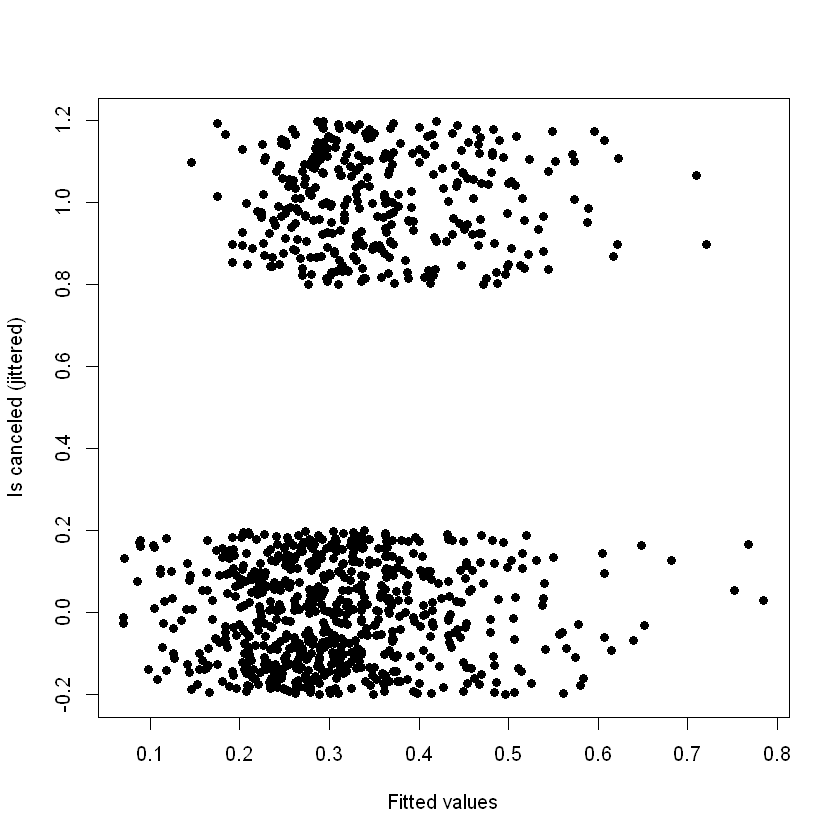

In [4]:

plot(jitter(mod.can.lg$y)~mod.can.lg$fitted.values,pch=16,xlab="Fitted values", ylab="Is canceled (jittered)")

threshold = 0.5;
TP= sum( (mod.can.lg$fitted.values>threshold) & mod.can.lg$y) ;
TN= sum((mod.can.lg$fitted.values<threshold) & (!mod.can.lg$y));


(TPR=TP/sum( mod.can.lg$y))
(FPR=1- TN/sum(!mod.can.lg$y))


In [27]:
install.packages('library(pscl)')
library(pscl)
pR2(mod.can.lg)  # look for 'McFadden'


Warning message:
"package 'library(pscl)' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


ERROR: Error in library(pscl): there is no package called 'pscl'


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6435

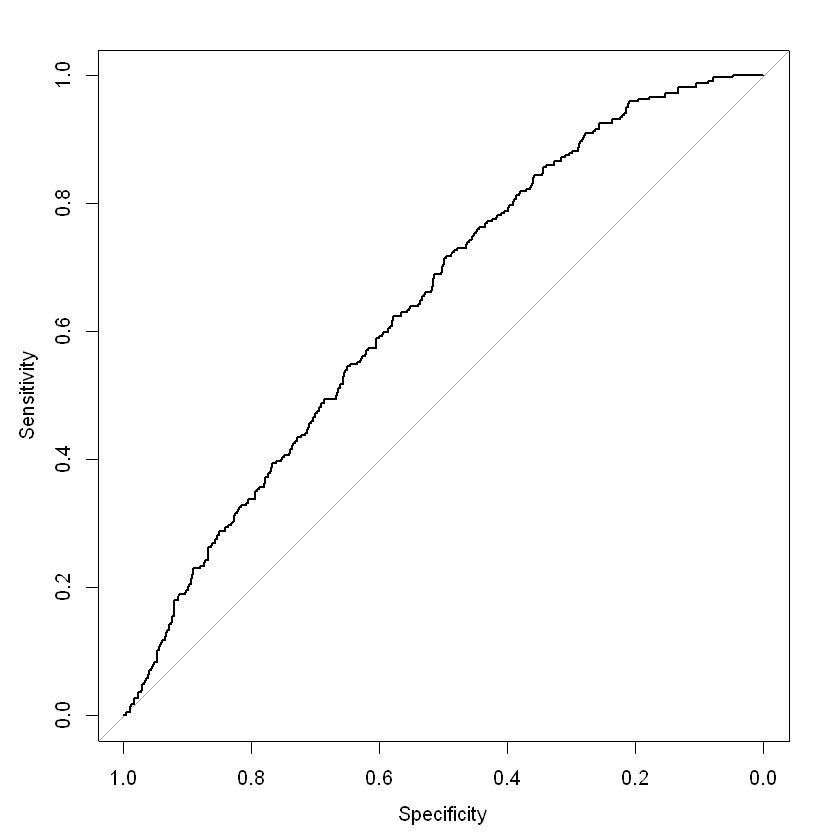

In [21]:
#install.packages('pROC')
library(pROC)
mod.can.lg.roc<-roc(mod.can.lg$y,mod.can.lg$fitted.values)
mod.can.lg.roc$auc
plot(mod.can.lg.roc)

## 5.2 Generalized linear model 

The logistic regression is a special case of the generalized linear model. 

Suppose that the outcome $y$ follows a distribution that belongs to the exponential family 
$$
p(y | \theta, \tau)= h(y,\tau) \exp\left\{ \frac{b(\theta) T(y)-A(\theta)  }{d(\tau)} \right\}.
$$
We usually use the canonical form 
$$
p(y | \theta, \tau)= h(y,\tau) \exp\left\{ \frac{\theta T(y)-A(\theta)  }{d \tau} \right\}.
$$

For regular use, we specify a GLM in the following manner. 

1. Pick an exponential form of distribution.
2. Set the predictor $X\beta$.
3. Pick a link function $g$ 
$$
\mathbb{E}[Y|X]=\mu = g^{-1}(y).
$$

Note that steps (1) and (3) are often tied. 
